<a href="https://colab.research.google.com/github/giaschutzer/datasci266-f24-final-project/blob/main/0_2_ndcg_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

### NDCG Scores

In [34]:
aspect = pd.read_csv("/content/drive/MyDrive/Code + Data/Final NDCG Scores/aspect_ndcg_scores.csv")
review_type = pd.read_csv("/content/drive/MyDrive/Code + Data/Final NDCG Scores/ndcg_scores_review_type.csv")
stars_bn = pd.read_parquet("/content/drive/MyDrive/Code + Data/Final NDCG Scores/stars_bn_final_errors_NDCG.parquet")[2:]
readability = pd.read_csv("/content/drive/MyDrive/Code + Data/Final NDCG Scores/readability_ndcg_scores.csv")

In [35]:
stars_bn.reset_index(inplace=True)

In [36]:
aspect = aspect.iloc[:, 1]
aspect.columns = ['Aspects']
review_type = review_type[['Baseline Model (Linear Regression)', 'Model 1 (Random Forest - Few Shot Categorization)']]
stars_bn = stars_bn[['Stars, Reviewer Cumulative Helpfulness Model', 'Final Stacked Model', "Business Nature Model, BERT Embeddings, Reviewer Cumulative Helpfulness Model"]]
readability = readability.iloc[:, 1]
readability.columns = ['Readability']

In [37]:
ndcg_data = pd.concat([aspect, review_type, stars_bn, readability], axis = 1)

In [38]:
ndcg_data.columns = ['Review Aspects', 'Review Length (Baseline)', 'Review Type', 'Stars', 'Ensemble', 'Business Nature', 'Readability']

In [39]:
ndcg_data

,Review Aspects,Review Length (Baseline),Review Type,Stars,Ensemble,Business Nature,Readability
0,0.040689,0.009153,0.036617,0.126134,0.843659,0.843659,0.079704
1,0.078013,0.008654,0.033751,0.314194,0.810571,0.810583,0.123306
2,0.087010,0.017524,0.043810,0.445553,0.751860,0.744044,0.138933
3,0.110107,0.028504,0.047173,0.492861,0.744946,0.742990,0.163218
4,0.243487,0.090196,0.106180,0.726048,0.805942,0.807594,0.230279
5,0.830857,0.813813,0.825902,0.826760,0.959548,0.967294,0.890431


In [40]:
x = ['k=5', 'k=25', 'k=50', 'k=100', 'k=1000', 'all']

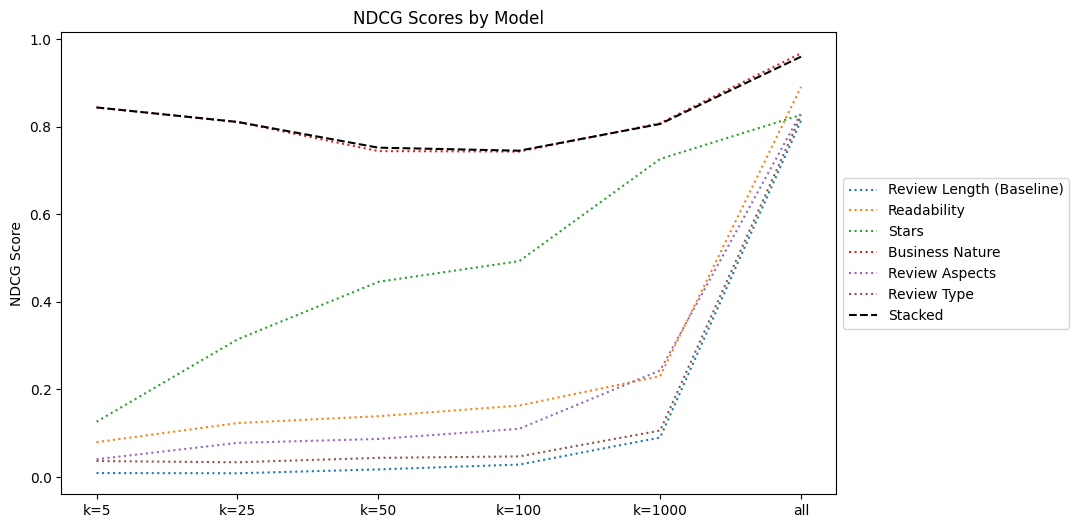

In [41]:
# plot lines
plt.figure(figsize=(10,6))
plt.plot(x, ndcg_data['Review Length (Baseline)'], label = "Review Length (Baseline)", linestyle=":")
plt.plot(x, ndcg_data['Readability'], label = "Readability", linestyle=":")
plt.plot(x, ndcg_data['Stars'], label = "Stars", linestyle=":")
plt.plot(x, ndcg_data['Business Nature'], label = "Business Nature", linestyle=":")
plt.plot(x, ndcg_data['Review Aspects'], label = "Review Aspects", linestyle=":")
plt.plot(x, ndcg_data['Review Type'], label = "Review Type", linestyle=":")
plt.plot(x, ndcg_data['Ensemble'], label = "Stacked", linestyle="--", color='black')
plt.title('NDCG Scores by Model', fontsize=12)
plt.ylabel('NDCG Score')
plt.legend(bbox_to_anchor=(1, .7))
plt.show()